# Ejercicio 2

In [2]:
import numpy as np
import networkx as nx

![ej2](img/Guia_2_ej_2.png)

### Inciso (a)

In [19]:
#matriz de adyacencia (a)
ady_a = np.matrix([[0,1,1,1,0,1],
         [1,0,1,1,0,0],
         [1,1,0,0,0,1],
         [1,1,0,0,0,0],
         [0,0,0,0,0,0],
         [1,0,1,0,0,0]])

#matriz de adyacencia (b)
ady_b = np.matrix([[0,0,1,1,0,1],
                     [1,0,1,0,0,0],
                     [1,1,0,0,0,1],
                     [0,1,0,0,0,0],
                     [0,0,0,0,0,0],
                     [0,0,0,0,0,0]])

#creo los grafos a partir de las matrices de adyacencia
Graf_a = nx.from_numpy_matrix(ady_a)
Graf_b = nx.from_numpy_matrix(ady_b,create_using=nx.MultiDiGraph())

#mapeo las permutaciones
mapping = {4:5, 5:4}
Graf_a_permutada = nx.relabel_nodes(Graf_a, mapping)
Graf_b_permutada = nx.relabel_nodes(Graf_b, mapping)

#matriz de adyacencia permutada (a)
ady_a_permutada = nx.to_numpy_matrix(Graf_a_permutada)

#matriz de adyacencia permutada (a)
ady_b_permutada = nx.to_numpy_matrix(Graf_b_permutada)


### Inciso (b)

In [21]:
#busco el coeficiente de clustering medio
clust_medio_a = nx.average_clustering(Graf_a)
print(f'El coeficiente de Clustering medio es {round(clust_medio_a,2)}')

El coeficiente de Clustering medio es 0.64


### Inciso (c)

In [44]:
#busco los posibles caminos simples entre el nodo 1 y 3 (0 y 2 para la nomeclatura que utilizo)

caminos = []
for camino in nx.all_simple_paths(Graf_a, source=0, target=2):
    if (len(camino) == 3) :
        caminos.append(camino)
        
print(f'Los caminos posibles son {len(caminos)}: \n {caminos} ' )

Los caminos posibles son 2: 
 [[0, 1, 2], [0, 5, 2]] 


### Inciso (d)

Networkx no tiene un algoritmo que cuente los ciclos en redes no dirigidas. El algoritmo que tiene es uno que te genera las bases de los ciclos. Asi que sacamos la idea del algoritmo de libro de Chai Lee$^{[1]}$ donde plantea el uso de combinaciones lineales desusodichas bases.

[1]ALGORITHMIC APPROACHES TO CIRCUIT ENUMERATION PROBLEMS AND APPLICATIONS by BOON CHAI LEE (1978) page 52 http://dspace.mit.edu/bitstream/handle/1721.1/68106/FTL_R_1982_07.pdf

In [94]:

list(nx.find_cycle(Graf_a, orientation='ignore'))

[(0, 1, 'forward'), (1, 2, 'forward'), (2, 0, 'forward')]

In [149]:
import itertools

#busco los ciclos de longitud 4 de la red a
ciclos_a =[]
bases_ciclos_a = nx.cycle_basis(Graf_a)
print(bases_ciclos_a)

#me fijo si las combinaciones lineales de las bases pertenecen al grafo:   
for i in range(1,len(bases_ciclos_a) + 1):
    for n in itertools.combinations(bases_ciclos_a, i):
        ciclo = list(dict.fromkeys(np.concatenate(n))) #me deja la lista de nodos limpia sin repeticiones
       
        #chequeo que tenga longitud 4:
        if len(ciclo) == 4:
            
            #chequeo si la combinacion pertenee al conjunto de caminos: 
            #esto lo que hace era chequear si todos los nodos del ciclo estan enlazados pero no es necesariamente cierto
            if all(Graf_a.has_edge(enlace[0],enlace[1]) == False for enlace in list(itertools.combinations(ciclo, 2))) == False:
                ciclos_a.append(ciclo)
            
            
            #esto es falso porque no todas las combinaciones estan unidas si es un ciclo. lo que hice antes fue 
            #fijarme si para todas las permutaciones del string de un ciclo habia un camino posible. pero esto no es
            # necesariemente cierto porque tal vez ese camino posible no es cerrado



print(ciclos_a)
    
        



[[2, 5, 0], [1, 3, 0], [1, 2, 0]]
[[2, 5, 0, 1], [1, 3, 0, 2]]


In [147]:
#para las redes dirigidas (en nuestrp caso, b) networkx tiene un algoritmo armado
ciclos_b = []
for ciclo in nx.simple_cycles(Graf_b):
    if len(ciclo) == 4 :
        ciclos_b.append(ciclo)

print(f'La cantidad de ciclos de longitud 4 de la red a es {len(ciclos_a)}')
print(f'La cantidad de ciclos de longitud 4 de la red b es {len(ciclos_b)}')

La cantidad de ciclos de longitud 4 de la red a es 26
La cantidad de ciclos de longitud 4 de la red b es 1


# Ejercicio 3 

![ej3](img/Guia_2_ej_3.png)

Para pasar de matrices calculadas en python a latex y verlas mejor pasamos arrays a latex con la siguiente función.

In [19]:
#make latex matrix
import array_to_latex as a2l
to_tex = lambda A : a2l.to_ltx(A, frmt = '{:6.0f}', arraytype = 'array', mathform=True)

In [20]:
#* La matriz de adyacencia de la red (a)
import numpy as np
A_ady = np.matrix([[0 , 1 , 0 , 0 , 1], 
    [0 , 0 , 1 , 0 , 0],
    [1 , 0 , 0 , 0 , 1],
    [0 , 1 , 1 , 0 , 0],
    [0 , 0 , 0 , 0 , 0]])

In [21]:
#La matriz de co-citas de la red (a)
A_ady_t = np.transpose(A_ady)
A_co = A_ady * A_ady_t

In [23]:
#La matriz de incidencia de la red (b)
B_ind = np.matrix(
    # 1 2 3 4 5 
   # 1 
    [[1 , 0 , 1 , 0 , 0], 
    # 2
     [0 , 1 , 1 , 0 , 0],
    #3
     [0 , 0 , 0 , 1 , 0],
    #4
     [0 , 1 , 1 , 1 , 1]])

In [25]:
#La matriz proyección de la red (b) en los vértices oscuros.
B_ind_t = np.transpose(B_ind)
B_proy_oscura = B_ind_t * B_ind

* La matriz de adyacencia de la red (a):


$$ A_{ady} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
0 & 1 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 & 0\\
1 & 0 & 0 & 0 & 1\\
0 & 1 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0
\end{matrix}\ \right)
\end{array}
$$

* La matriz de co-citas de la red (a):

$$A_{co} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       2  &       0  &       1  &       1  &       0 \\
       0  &       1  &       0  &       1  &       0 \\
       1  &       0  &       2  &       0  &       0 \\
       1  &       1  &       0  &       2  &       0 \\
       0  &       0  &       0  &       0  &       0 
\end{matrix}\ \right)
\end{array}
$$

La matriz de incidencia de la red (b): 

$$B_{ind} = 
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       1  &       0  &       1  &       0  &       0 \\
       0  &       1  &       1  &       0  &       0 \\
       0  &       0  &       0  &       1  &       0 \\
       0  &       1  &       1  &       1  &       1 
\end{matrix}\ \right)
\end{array}
$$

La matriz de proyección en los vértices oscuros de la red (b) es:

$$B_{proy} =  
\begin{array}{c}
\begin{matrix}
1 & 2 & 3 & 4 & 5
\end{matrix} \\
\left(\ \begin{matrix}
       1  &       0  &       1  &       0  &       0 \\
       0  &       1  &       1  &       0  &       0 \\
       0  &       0  &       0  &       1  &       0 \\
       0  &       1  &       1  &       1  &       1 
\end{matrix}\ \right)
\end{array}
$$


# Ejercicio 4

![ej4](img/Guia_2_ej_4.png)

# Ejercicio 5

### Inciso (a)

In [136]:
#Lmax es la maxima cantidad de enlaces que puede tener una red bipartita

def Lmax_bipartita(N1,N2):
    N2 = N2 + N1
    numero_enlaces = 0
    enlaces = []
    for n1 in range(N1):
        for n2 in range(N1,N2):
            enlaces.append((n1,n2))
            numero_enlaces += 1
    return numero_enlaces,enlaces


(2, [(0, 1), (0, 2)])

### Inciso (b)

In [137]:
def Lmax_monopartita(N1,N2):
    N = N1 + N2
    enlaces = list(itertools.combinations(np.arange(N), 2))
    numero_enlaces = len(enlaces)
    return numero_enlaces,enlaces
                         

def diferencia_enlaces(N1,N2):
    Lmax_monopartita(N1,N2)[0]
    diferencia =  Lmax_monopartita(N1,N2)[0] - Lmax_bipartita(N1,N2)[0]
    return diferencia



### Inciso (c)

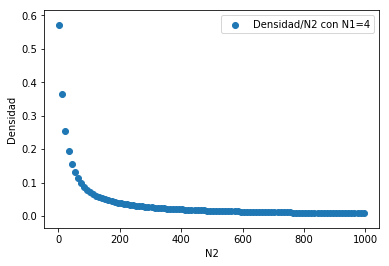

In [138]:
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

i=4
densidades = []
lista_N2 = []
while i<= 1000:
    Red_i = nx.Graph()
    Red_i.add_edges_from(Lmax_bipartita(4,i)[1])
    densidad = nx.density(Red_i)
    
    densidades.append(densidad)
    lista_N2.append(i)
    i+=10


    
plt.figure()
plt.scatter(lista_N2,densidades,label="Densidad/N2 con N1=4")
plt.xlabel("N2")
plt.ylabel("Densidad")
plt.legend()

Como se puede observar en el gráfico, la densidad decrece exponencialmente a medida que N2 crece con respecto a N1.
Este resultado tiene sentido ya que la matriz de adyacencia de una red bipartita tiene la forma $\Re^{(n+m) \times (n+m)}$ donde $\Re^{(n) \times (n)}$ y $\Re^{(m) \times (m)}$ son matrices de ceros acomodadas segun el Ejercicio 4 (a).

### Inciso (d)

Text(0, 0.5, '<k2>N2')

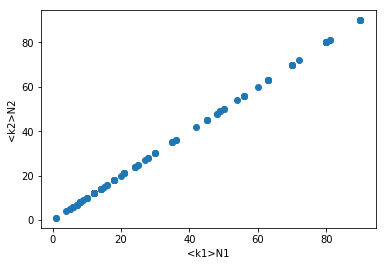

In [177]:
import random
import collections

i=4
k1_medio = []
k2_medio = []
N1_list = []
N2_list = []
while i<= 1000:
    #genero N1 y N2 random entre 1 y 100
    N1 = random.randint(1,10)
    N2 = random.randint(1,10)
    #print(N1,N2)
    
    #creo la red bipartita
    Red_i = nx.Graph()

    Red_i.add_nodes_from(np.arange(N1), bipartite=0)
    Red_i.add_nodes_from(np.arange(N1,N1+N2), bipartite=1)
    Red_i.add_edges_from(Lmax_bipartita(N1,N2)[1])
    
    n1, n2 = bipartite.sets(Red_i)
    k1,k2 = bipartite.degrees(Red_i,n2)
    
    #busco la media de los grados de cada set
    k1_m = np.mean(np.array([i[1] for i in k1]))
    k2_m = np.mean(np.array([i[1] for i in k2]))

    k1_medio.append(k1_m)
    k2_medio.append(k2_m)
    N1_list.append(N1)
    N2_list.append(N2)
    
    
    #print(k1)
    #print(k2)
    i+=10 
    
x = np.array(k1_medio)*np.array(N1_list)
y = np.array(k2_medio)*np.array(N2_list)
plt.figure()
plt.scatter(x,y)
plt.xlabel("<k1>N1")
plt.ylabel("<k2>N2")
    

Esto ocurre ya que en una red bipartita la cantidad de enlaces maximo va a estar dada por el limite que impone el conjunto opuesto: la cantidad de enlaces por nodo va a ser exactamente el numero de nodos del otro conjunto.
Entonces se va a cumplir que $<k_{1}>N_{1}=<k_{2}>N_{2}$

# Ejercicio 6

Consideramos el conjunto de todos los caminos entre el nodo-i y el nodo-j en un grafo no dirigido de
matriz de adyacencia A. Los caminos de largo r se representan por la matriz $A^{r}$. Queremos ver que la suma de los pesos de todos los caminos que conectan el nodo-i con el nodo-j también está dada por $Z_{ij}$, el elemento $ij$ de la matriz $Z = (I − \alpha A)^{−1}$ *(1)*. 

#### a)
Tenemos que $A^{r}$ son los caminos de largo r. La suma de todos los caminos la definimos como $Z = \sum_{r=0}^{\infty} \alpha^{r} A^{r}$ y queremos demostrar la igualdad con *(1)*. 
Multiplicamos de ambos lados por $(I − \alpha A)$ con lo cual nos queda:

$Z(I − \alpha A) = \sum_{r=0}^{\infty} \alpha^{r} A^{r} (I − \alpha A) = I
$

Distribuimos 

$\sum_{r=0}^{\infty} \alpha^{r} A^{r}  − \sum_{r=0}^{\infty} \alpha^{r+1} A^{r+1} = I$

Arreglamos los límites de la sumatoria para tener iguales exponentes:

$\sum_{r=0}^{\infty} \alpha^{r} A^{r}  − \sum_{r=1}^{\infty} \alpha^{r+1} A^{r+1} = I$

Eso nos deja sólo el término con $r = 0$:

$\alpha^{0} A^{0} = I$

$1 I = I$

Con eso probamos la igualdad de ambas representaciones de Z. 

#### b)
La sumatoria es infinita, podría diverger. Es una suma geométrica por lo cual $\alpha A < 1$. Por ende necesita una restricción al valor de $\alpha$ para que converja. Mientras que $\alpha < \frac{1}{max (A_{ij})}$ los caminos más largos tendran menos peso (pues un número menor a uno a la números positivos va dando más chico) que los más cortos. Esto tiene sentido, estamos diciendo que los vértices están más conectados lo hacen por caminos más cortos.

#### c)

# TODO
Como $A_{ij}^{r}$ es la cantidad de caminos de i a j de largo $r$, necesitamos para ver la distancia más corta el menor $r$ para el cual el elemento es distinto de cero. Ejemplo: si los nodos i y j están conectados directamente la matriz $A$ tendrá un $1$ en la posición $(ij)$. Si otros dos nodos están a dos de distancia, $A_{ij} \neq 1$, pero $A_{ij}^{2} \geq 1$ . Por ende, necesitamos el menor $r$ para el cual $Z_{ij} \neq 0$, ese $r$ es la distancia geodésica entre dos nodos.

$Z_{ij}(r) = (\delta_{ij} - \alpha A_{ij})^{-1}$

$Z_{ij}(r) = \sum (\alpha A_{ij})^{r} = \frac{1}{1 - \alpha A_{ij}}$


Tomo logaritmo:

$log(Z_{ij}(r)) = - log(1 - \alpha A_{ij})$

Tomo $log(\alpha) = z$, entonces $\alpha = e^z$

$log(Z_{ij}(r)) = - log(1 - e^z A_{ij})$

$\frac{d  (log(Z_{ij}))}{dz} = \frac{1}{1 - e^z A_{ij}} e^z  A_{ij} = \frac{\alpha  A_{ij}}{1 - \alpha A_{ij}}  = \sum_{r=0}^{\infty} \alpha A (\alpha A)^r = \sum_{r=0}^{\infty} (\alpha A)^{r+1} = \sum_{r=1}^{\infty} (\alpha A)^{r} = \alpha A \sum_{r=0}^{\infty} (\alpha A)^{r} = \alpha A Z_{ij} $

# Ejercicio 9

O como nos gusta llamarlo...

<table><tr>
<td> <img src="img/meme_guia_02.jpg" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="img/Guia_2_ej_9_rta.svg" alt="Drawing" style="width: 800px;"/> </td>
</tr></table>

El tamaño del conjunto de vértices de corte minimal entre los nodos $s$ y $t$ es $k = 3$. En gris se seleccionó una elección particular de los nodos. De colores se observan los $k$ caminos independientes.Los nodos a elegir entonces deben pertenecer uno a cada camino, como mínimo, de manera de separar por completo a $s$ y $t$. 